In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import RandomForestRegressor 

In [3]:
df=pd.read_csv("/content/train.csv")

In [4]:
df.shape

(210240, 16)

In [ ]:
df.head(10)

,Timestamp,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity
0,2019-01-01 00:00:00,12.5,6.9,0.21,1005,121,1.0,0,0,0,0,0.258,1,173.92,1.4,68.82
1,2019-01-01 00:10:00,12.3,6.9,0.21,1005,122,1.0,0,0,0,0,0.258,1,171.79,1.3,69.73
2,2019-01-01 00:20:00,12.1,6.9,0.21,1005,124,1.0,0,0,0,0,0.258,1,169.59,1.3,70.65
3,2019-01-01 00:30:00,12.0,6.9,0.21,1005,125,1.0,0,0,0,0,0.258,1,167.37,1.3,71.11
4,2019-01-01 00:40:00,11.8,6.9,0.21,1005,126,1.0,0,0,0,0,0.258,1,165.13,1.3,71.91
5,2019-01-01 00:50:00,11.6,6.9,0.21,1005,128,1.0,0,0,0,0,0.258,1,162.89,1.3,72.87
6,2019-01-01 01:00:00,11.4,6.9,0.21,1005,129,1.0,0,0,0,0,0.258,1,160.63,1.3,73.83
7,2019-01-01 01:10:00,11.3,6.9,0.21,1005,131,1.0,0,0,0,0,0.258,1,158.38,1.3,74.32
8,2019-01-01 01:20:00,11.1,6.9,0.21,1005,133,1.0,0,0,0,0,0.258,1,156.12,1.3,75.31
9,2019-01-01 01:30:00,10.9,6.9,0.21,1004,135,1.1,0,0,0,0,0.258,1,153.87,1.3,76.24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210240 entries, 0 to 210239
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           210240 non-null  object 
 1   Temperature         210240 non-null  float64
 2   Dew Point           210240 non-null  float64
 3   Surface Albedo      210240 non-null  float64
 4   Pressure            210240 non-null  int64  
 5   Wind Direction      210240 non-null  int64  
 6   Wind Speed          210240 non-null  float64
 7   Clearsky DHI        210240 non-null  int64  
 8   Clearsky DNI        210240 non-null  int64  
 9   Clearsky GHI        210240 non-null  int64  
 10  Fill Flag           210240 non-null  int64  
 11  Ozone               210240 non-null  float64
 12  Cloud Type          210240 non-null  int64  
 13  Solar Zenith Angle  210240 non-null  float64
 14  Precipitable Water  210240 non-null  float64
 15  Relative Humidity   210240 non-nul

In [ ]:
df.columns

Index(['Timestamp', 'Temperature', 'Dew Point', 'Surface Albedo', 'Pressure',
       'Wind Direction', 'Wind Speed', 'Clearsky DHI', 'Clearsky DNI',
       'Clearsky GHI', 'Fill Flag', 'Ozone', 'Cloud Type',
       'Solar Zenith Angle', 'Precipitable Water', 'Relative Humidity'],
      dtype='object')

In [ ]:
df.isna().sum()

Timestamp             0
Temperature           0
Dew Point             0
Surface Albedo        0
Pressure              0
Wind Direction        0
Wind Speed            0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Fill Flag             0
Ozone                 0
Cloud Type            0
Solar Zenith Angle    0
Precipitable Water    0
Relative Humidity     0
dtype: int64

In [ ]:
df.describe()

,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity
count,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000,210240.000000
mean,26.795495,13.447805,0.211623,996.856141,209.095453,1.918037,96.720681,225.098992,249.938537,0.288699,0.268813,2.513604,89.745758,3.377582,53.364443
std,8.639162,10.234861,0.020889,7.226820,101.616108,1.194954,120.334380,277.920322,325.049751,1.052178,0.015632,3.093565,42.852632,2.261960,29.692608
min,1.000000,-12.400000,0.170000,978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.217000,0.000000,2.210000,0.300000,4.100000
25%,20.800000,4.900000,0.200000,990.000000,109.000000,1.100000,0.000000,0.000000,0.000000,0.000000,0.259000,0.000000,53.140000,1.500000,25.540000
50%,27.300000,13.100000,0.200000,997.000000,248.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.270000,1.000000,89.400000,2.500000,51.210000
75%,32.200000,24.400000,0.230000,1003.000000,293.000000,2.500000,194.000000,486.000000,533.000000,0.000000,0.279000,6.000000,126.440000,5.700000,80.820000
max,48.900000,29.100000,0.260000,1013.000000,360.000000,9.500000,603.000000,1008.000000,1053.000000,5.000000,0.351000,9.000000,177.950000,8.900000,100.000000


In [ ]:
df_corr = df[['Temperature', 'Dew Point', 'Surface Albedo', 'Pressure',
       'Wind Direction', 'Wind Speed', 'Clearsky DHI', 'Clearsky DNI',
       'Clearsky GHI', 'Fill Flag', 'Ozone', 'Cloud Type',
       'Solar Zenith Angle', 'Precipitable Water', 'Relative Humidity']].corr()
df_corr

,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity
Temperature,1.000000,0.261959,0.546195,-0.573081,-0.087679,0.400666,0.516226,0.472744,0.534371,0.120396,0.616804,0.213427,-0.558141,0.425330,-0.375786
Dew Point,0.261959,1.000000,0.010464,-0.534637,-0.271392,0.095185,0.055463,0.042353,0.072345,0.148648,0.041326,0.556847,-0.129139,0.862939,0.756159
Surface Albedo,0.546195,0.010464,1.000000,-0.419576,-0.054802,0.319236,0.130688,0.013071,0.088614,0.032728,0.419163,0.020605,-0.142041,0.110625,-0.367921
Pressure,-0.573081,-0.534637,-0.419576,1.000000,0.237479,-0.348968,-0.081990,-0.068340,-0.119537,-0.149947,-0.503190,-0.496451,0.184072,-0.765089,-0.181320
Wind Direction,-0.087679,-0.271392,-0.054802,0.237479,1.000000,0.012320,0.091096,0.075611,0.066095,-0.090547,-0.104419,-0.233463,-0.065134,-0.347329,-0.159116
Wind Speed,0.400666,0.095185,0.319236,-0.348968,0.012320,1.000000,0.374315,0.447101,0.441383,0.055060,0.208603,0.090756,-0.424678,0.185088,-0.141111
Clearsky DHI,0.516226,0.055463,0.130688,-0.081990,0.091096,0.374315,1.000000,0.826321,0.914395,0.071525,0.085781,-0.039626,-0.863835,0.068949,-0.286436
Clearsky DNI,0.472744,0.042353,0.013071,-0.068340,0.075611,0.447101,0.826321,1.000000,0.950919,0.023974,0.063176,-0.022514,-0.869252,0.086767,-0.247211
Clearsky GHI,0.534371,0.072345,0.088614,-0.119537,0.066095,0.441383,0.914395,0.950919,1.000000,0.003519,0.104435,-0.004506,-0.889051,0.116491,-0.264614
Fill Flag,0.120396,0.148648,0.032728,-0.149947,-0.090547,0.055060,0.071525,0.023974,0.003519,1.000000,0.087823,0.252914,-0.123669,0.191116,0.062048


In [ ]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))

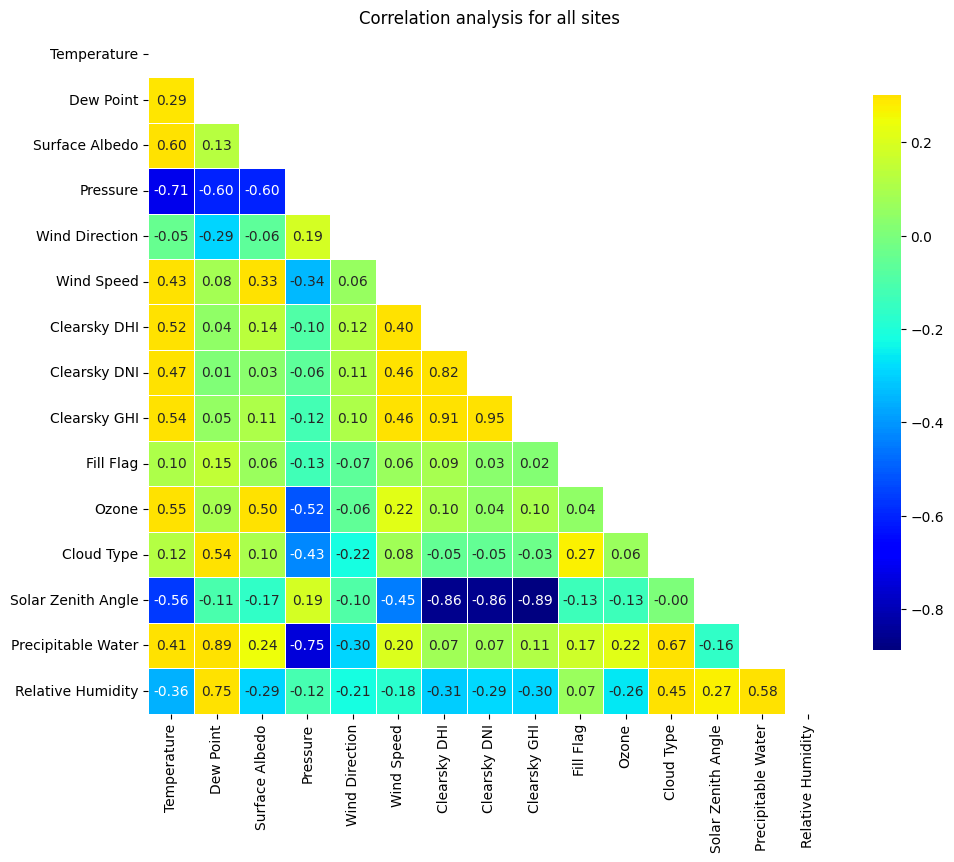

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_corr, mask=mask, cmap='jet', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8});
plt.title('Correlation analysis for all sites');

# Data Understanding

## Temperature

In [ ]:
df_corr['Temperature']

Temperature           1.000000
Dew Point             0.292697
Surface Albedo        0.596618
Pressure             -0.714592
Wind Direction       -0.046816
Wind Speed            0.425250
Clearsky DHI          0.523057
Clearsky DNI          0.472487
Clearsky GHI          0.540238
Fill Flag             0.100625
Ozone                 0.553733
Cloud Type            0.120401
Solar Zenith Angle   -0.564038
Precipitable Water    0.411293
Relative Humidity    -0.356118
Name: Temperature, dtype: float64

In [ ]:
dset = [df['Surface Albedo'], df['Pressure'],df['Wind Speed'],df['Clearsky DHI'],df['Clearsky DNI'],df['Clearsky GHI'],df['Ozone'],df['Solar Zenith Angle'], df['Precipitable Water']]

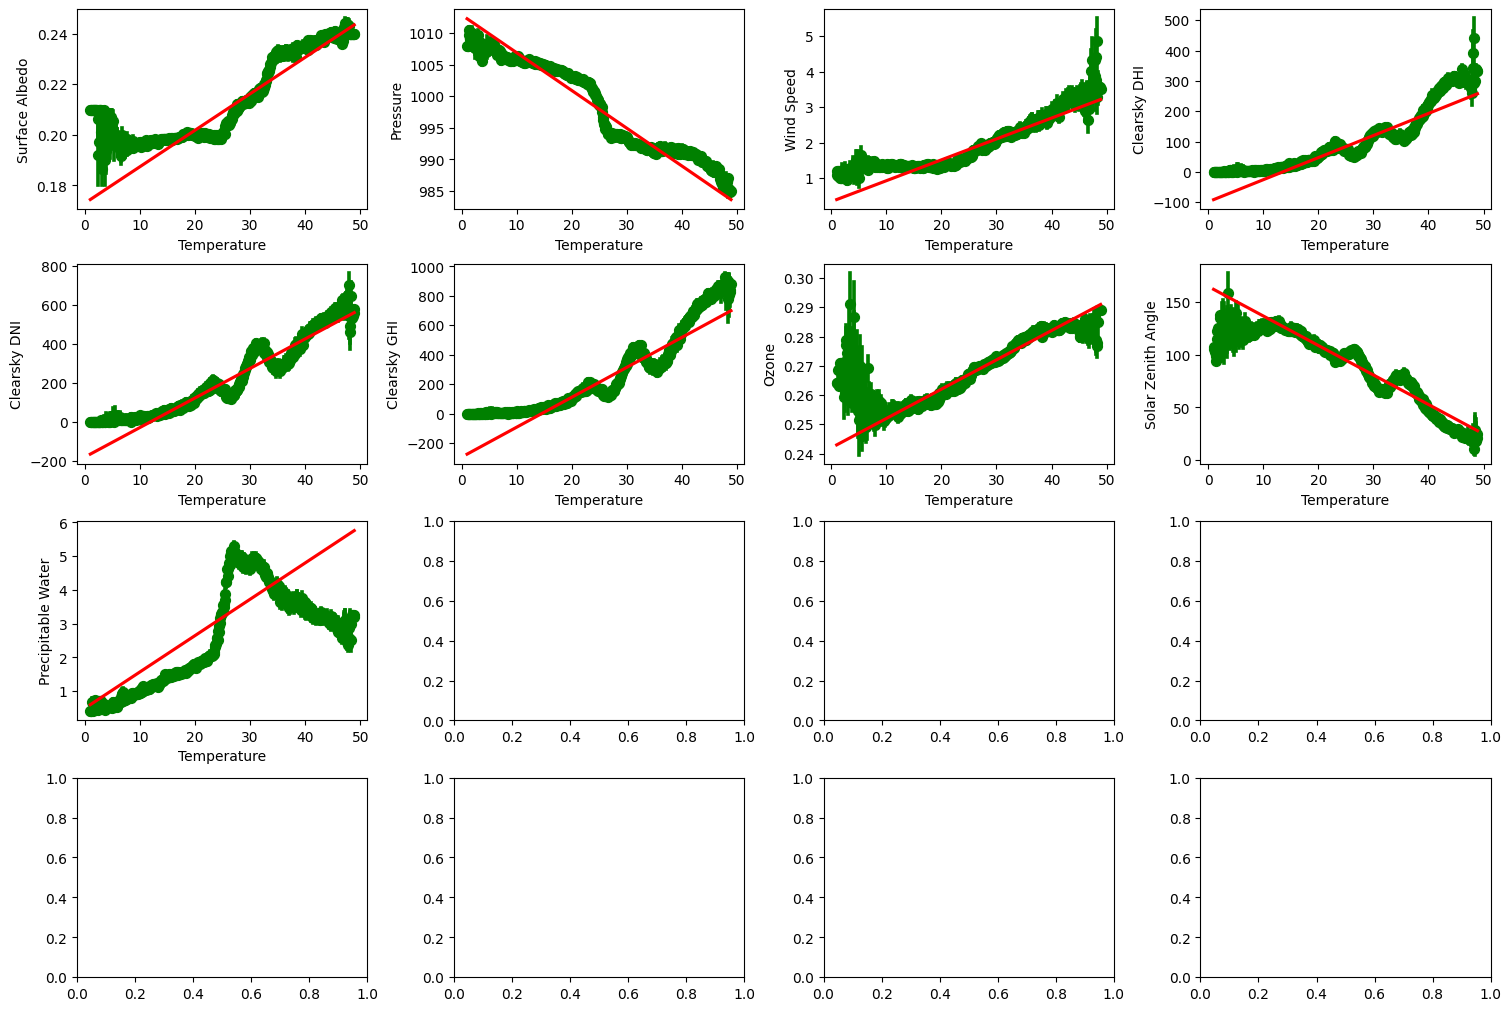

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(15, 10), layout='constrained',sharex=False, sharey=False)

for i in range(0,len(dset)):
    plt.subplot(4,4,i+1)
    sns.regplot(df, x = df['Temperature'], y= dset[i],x_estimator=np.mean, color='green', line_kws={"color": "red"})

plt.show()

## Dew Point

In [ ]:
df_corr['Dew Point']

Temperature           0.292697
Dew Point             1.000000
Surface Albedo        0.125001
Pressure             -0.600056
Wind Direction       -0.289789
Wind Speed            0.083232
Clearsky DHI          0.043487
Clearsky DNI          0.011840
Clearsky GHI          0.050812
Fill Flag             0.146825
Ozone                 0.094705
Cloud Type            0.542090
Solar Zenith Angle   -0.108148
Precipitable Water    0.886361
Relative Humidity     0.749485
Name: Dew Point, dtype: float64

In [ ]:
#consider corr values >0.2 or <-0.2
dset2 = [df['Temperature'], df['Pressure'],df['Wind Direction'],df['Cloud Type'],df['Precipitable Water'],df['Relative Humidity']]

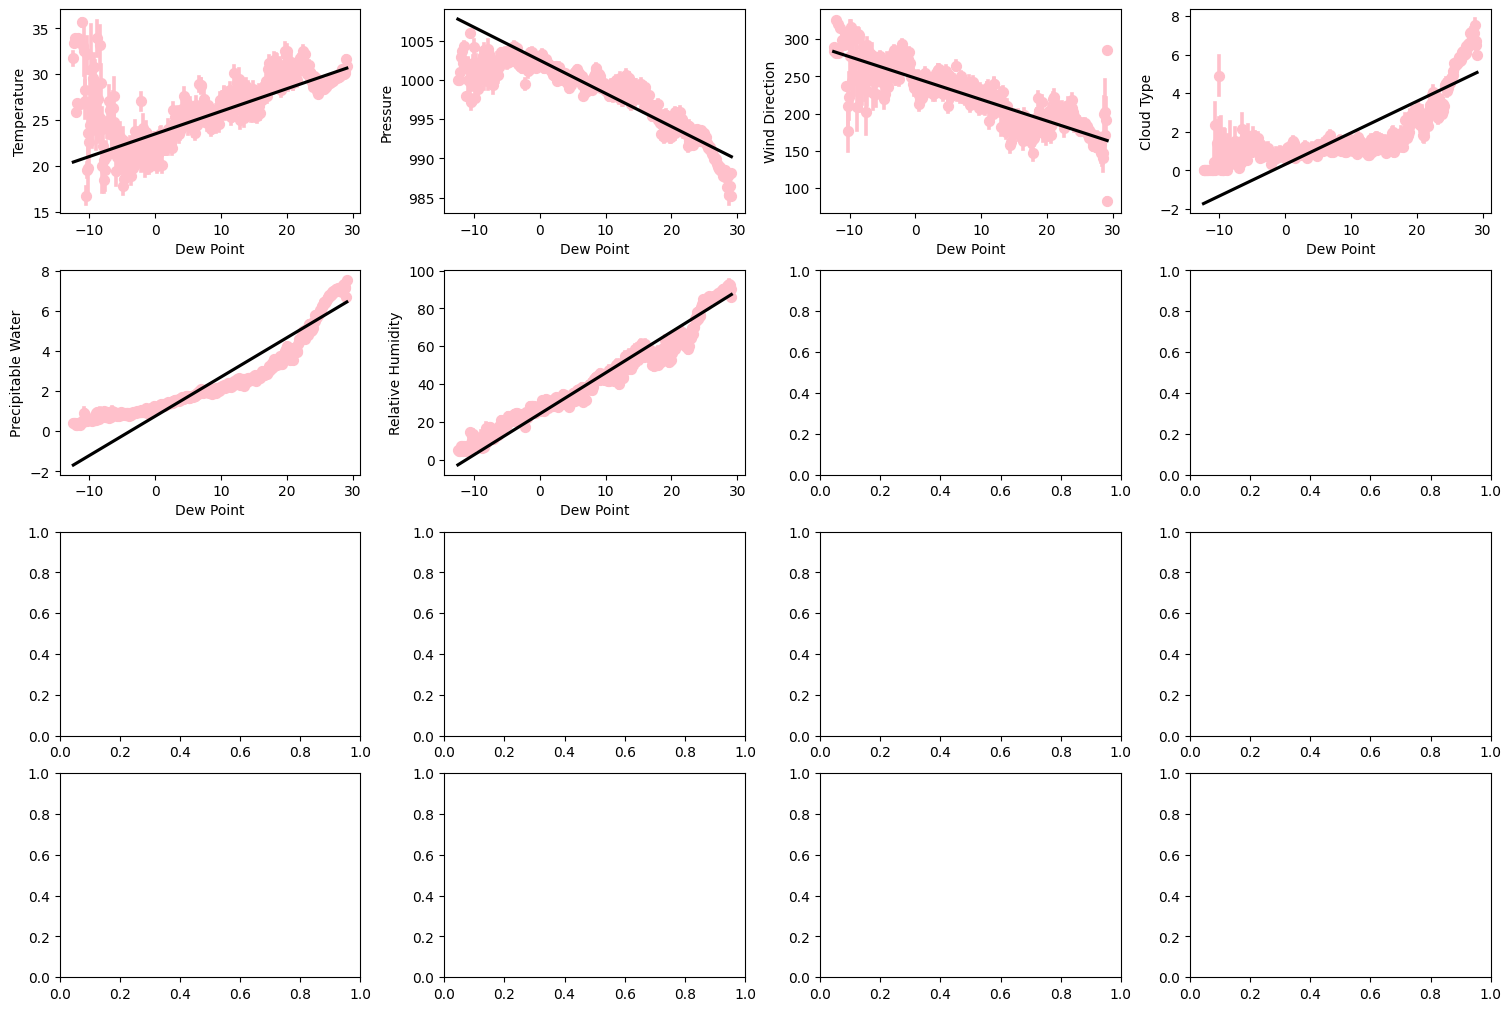

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(15, 10), layout='constrained',sharex=False, sharey=False)

for i in range(0,len(dset2)):
    plt.subplot(4,4,i+1)
    sns.regplot(df, x = df['Dew Point'], y= dset2[i],x_estimator=np.mean, color='pink',line_kws={"color": "black"})

plt.show()

## Surface Albedo

In [ ]:
df_corr['Surface Albedo']

Temperature           0.596618
Dew Point             0.125001
Surface Albedo        1.000000
Pressure             -0.602828
Wind Direction       -0.061984
Wind Speed            0.326732
Clearsky DHI          0.136141
Clearsky DNI          0.029014
Clearsky GHI          0.107675
Fill Flag             0.064981
Ozone                 0.503839
Cloud Type            0.096972
Solar Zenith Angle   -0.165791
Precipitable Water    0.244229
Relative Humidity    -0.291906
Name: Surface Albedo, dtype: float64

In [ ]:
#consider corr values >0.2 or <-0.2
dset3 = [df['Temperature'], df['Pressure'],df['Wind Speed'],df['Ozone'],df['Precipitable Water'],df['Relative Humidity']]

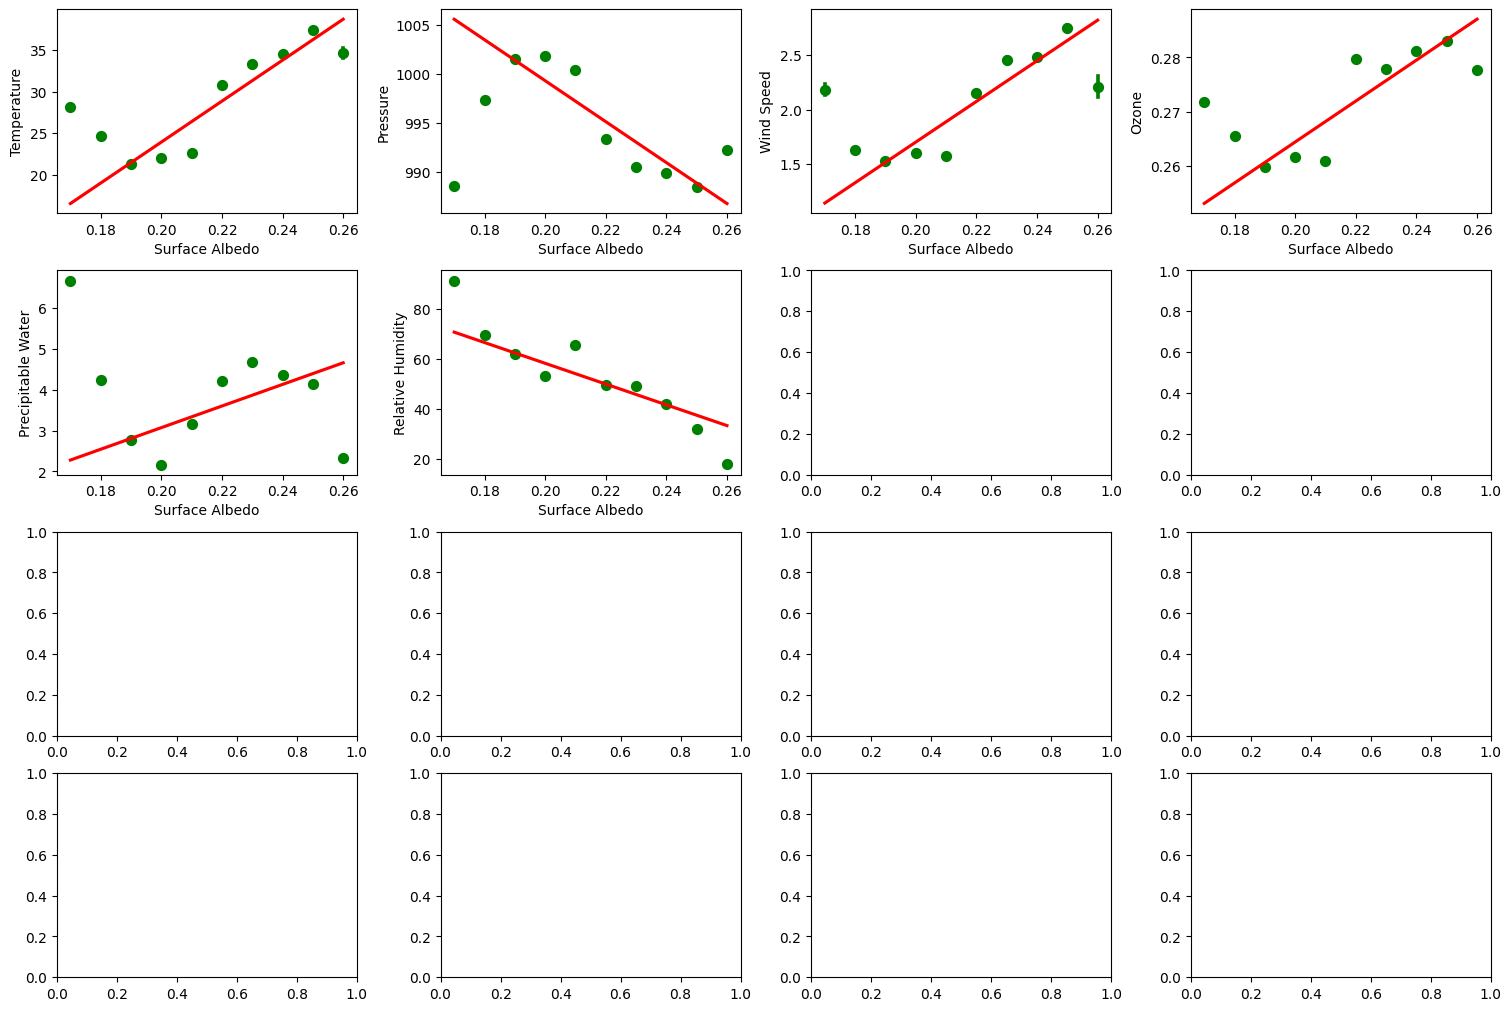

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(15, 10), layout='constrained',sharex=False, sharey=False)

for i in range(0,len(dset3)):
    plt.subplot(4,4,i+1)
    sns.regplot(df, x = df['Surface Albedo'], y= dset3[i],x_estimator=np.mean, color='green', line_kws={"color": "red"})

plt.show()

## Pressure

In [ ]:
df_corr['Pressure']

Temperature          -0.714592
Dew Point            -0.600056
Surface Albedo       -0.602828
Pressure              1.000000
Wind Direction        0.192014
Wind Speed           -0.341160
Clearsky DHI         -0.097864
Clearsky DNI         -0.063085
Clearsky GHI         -0.124399
Fill Flag            -0.127516
Ozone                -0.518967
Cloud Type           -0.426431
Solar Zenith Angle    0.191856
Precipitable Water   -0.747911
Relative Humidity    -0.117146
Name: Pressure, dtype: float64

In [ ]:
#consider corr values >0.4 or <-0.4
dset4 = [df['Temperature'], df['Dew Point'],df['Surface Albedo'],df['Cloud Type'],df['Ozone'],df['Precipitable Water']]

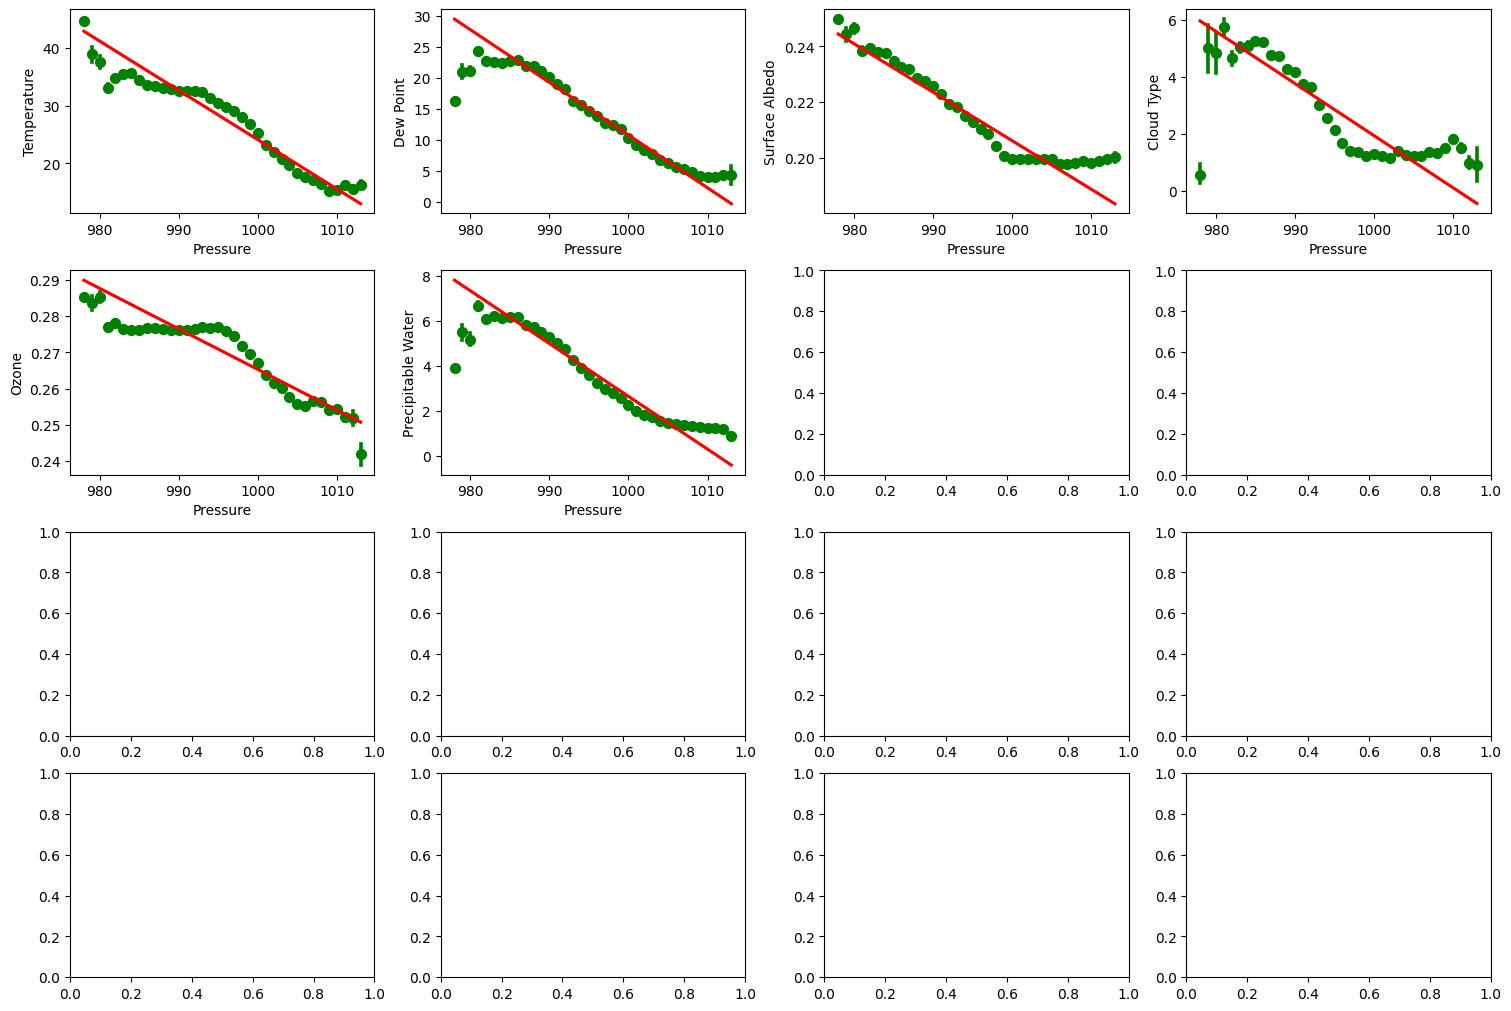

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(15, 10), layout='constrained',sharex=False, sharey=False)

for i in range(0,len(dset4)):
    plt.subplot(4,4,i+1)
    sns.regplot(df, x = df['Pressure'], y= dset4[i],x_estimator=np.mean, color='green', line_kws={"color": "red"})

plt.show()

## Wind Direction

In [ ]:
df_corr['Wind Direction']

Temperature          -0.046816
Dew Point            -0.289789
Surface Albedo       -0.061984
Pressure              0.192014
Wind Direction        1.000000
Wind Speed            0.058592
Clearsky DHI          0.115629
Clearsky DNI          0.109398
Clearsky GHI          0.100807
Fill Flag            -0.068953
Ozone                -0.061794
Cloud Type           -0.218748
Solar Zenith Angle   -0.097539
Precipitable Water   -0.295537
Relative Humidity    -0.214892
Name: Wind Direction, dtype: float64

In [ ]:
#consider corr values >0.2 or <-0.2
dset5 = [df['Dew Point'], df['Cloud Type'],df['Precipitable Water'],df['Relative Humidity']]

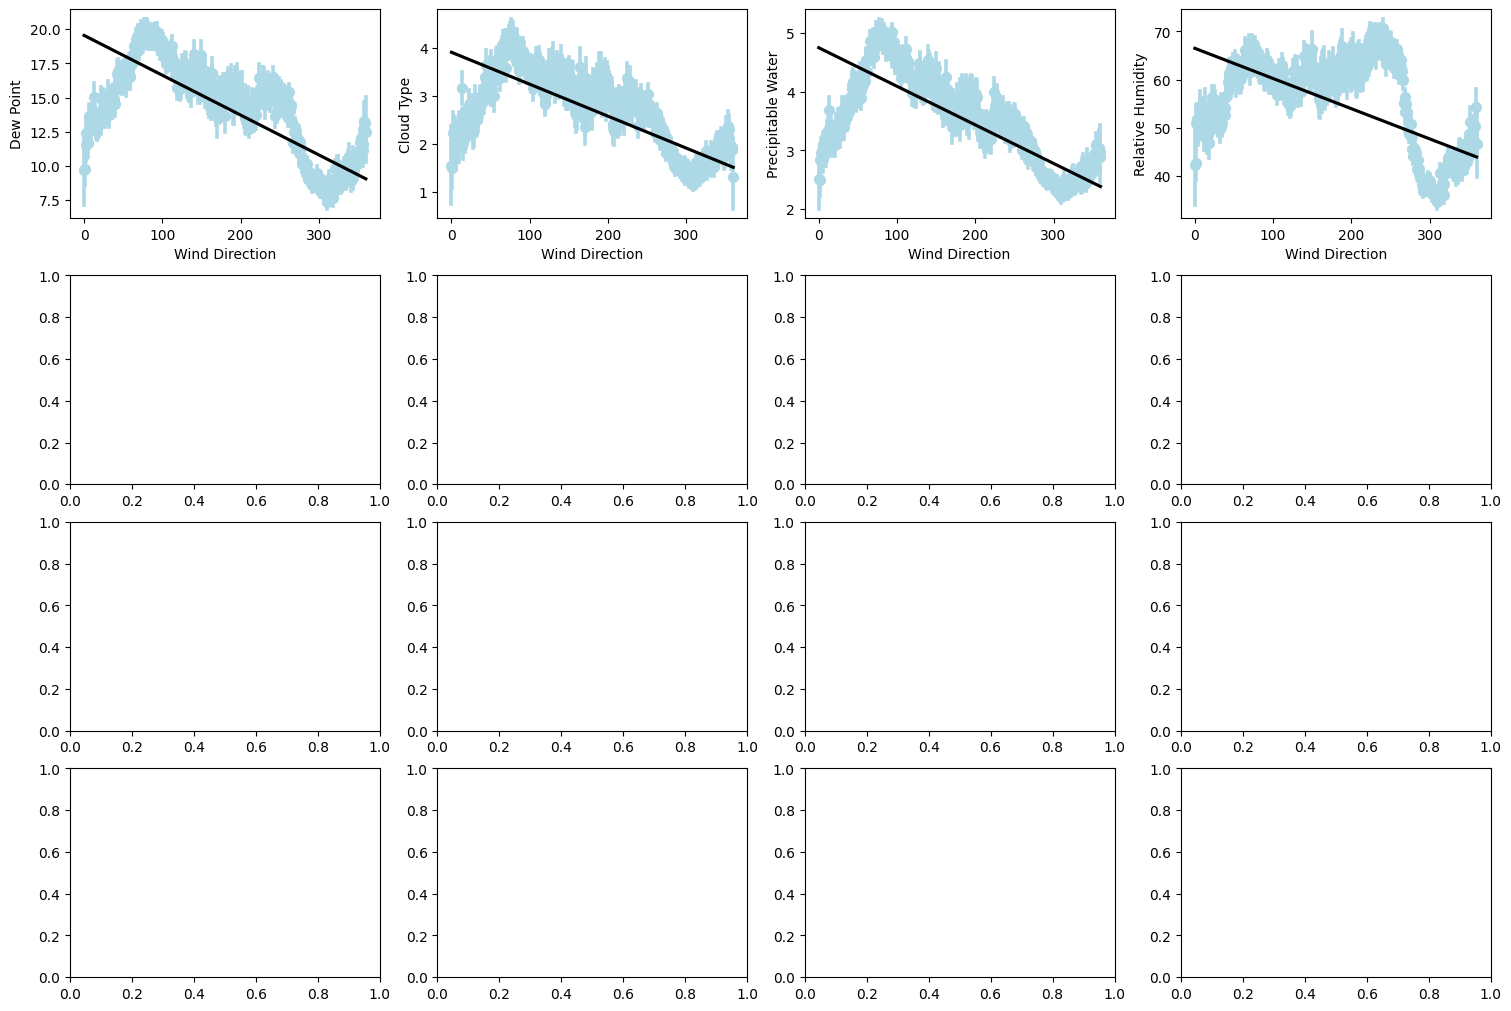

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(15, 10), layout='constrained',sharex=False, sharey=False)

for i in range(0,len(dset5)):
    plt.subplot(4,4,i+1)
    sns.regplot(df, x = df['Wind Direction'], y= dset5[i],x_estimator=np.mean, color='lightblue', line_kws={"color": "black"})

plt.show()

## Wind Speed

In [ ]:
df_corr['Wind Speed']

Temperature           0.425250
Dew Point             0.083232
Surface Albedo        0.326732
Pressure             -0.341160
Wind Direction        0.058592
Wind Speed            1.000000
Clearsky DHI          0.399801
Clearsky DNI          0.458944
Clearsky GHI          0.460741
Fill Flag             0.059929
Ozone                 0.219860
Cloud Type            0.076861
Solar Zenith Angle   -0.447351
Precipitable Water    0.200612
Relative Humidity    -0.181200
Name: Wind Speed, dtype: float64

In [ ]:
#consider corr values >0.2 or <-0.2
dset6 = [df['Temperature'],df['Surface Albedo'], df['Pressure'],df['Clearsky DHI'],df['Clearsky DNI'],df['Clearsky GHI'],df['Solar Zenith Angle']]

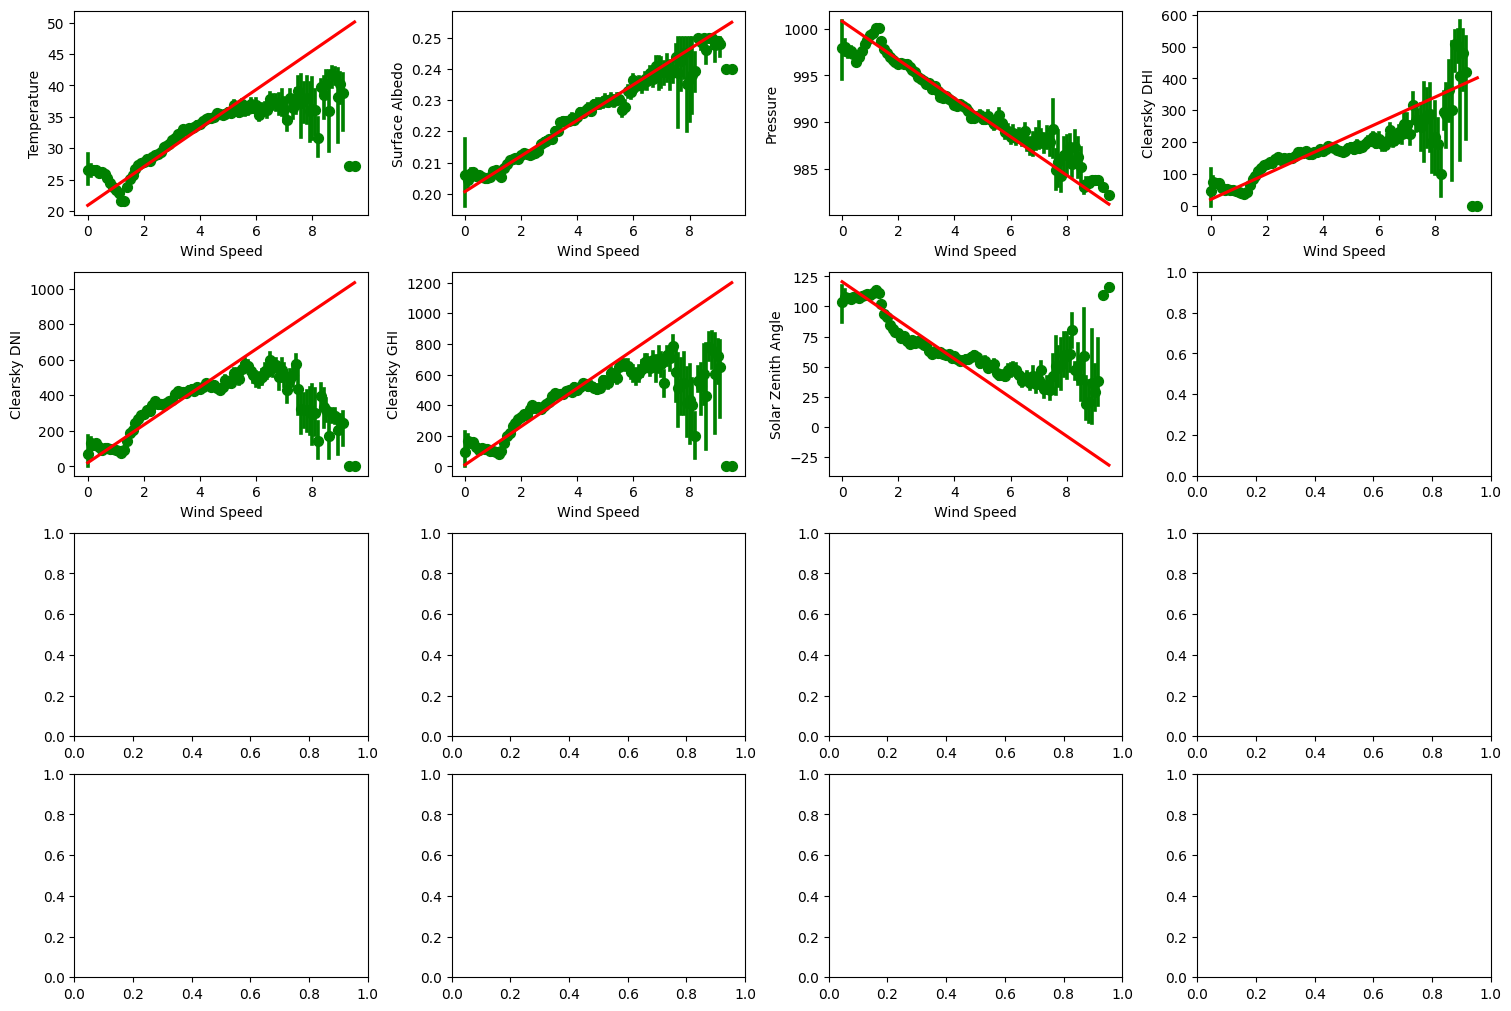

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(15, 10), layout='constrained',sharex=False, sharey=False)

for i in range(0,len(dset6)):
    plt.subplot(4,4,i+1)
    sns.regplot(df, x = df['Wind Speed'], y= dset6[i],x_estimator=np.mean, color='green', line_kws={"color": "red"})

plt.show()

## ClearSky DHI

In [ ]:
df_corr['Clearsky DHI']

Temperature           0.516226
Dew Point             0.055463
Surface Albedo        0.130688
Pressure             -0.081990
Wind Direction        0.091096
Wind Speed            0.374315
Clearsky DHI          1.000000
Clearsky DNI          0.826321
Clearsky GHI          0.914395
Fill Flag             0.071525
Ozone                 0.085781
Cloud Type           -0.039626
Solar Zenith Angle   -0.863835
Precipitable Water    0.068949
Relative Humidity    -0.286436
Name: Clearsky DHI, dtype: float64

In [ ]:
#consider corr values >0.2 or <-0.2
dset_DHI = [df['Temperature'], df['Wind Speed'],df['Clearsky DNI'],df['Clearsky GHI'],df['Ozone'],df['Solar Zenith Angle'],df['Relative Humidity']]

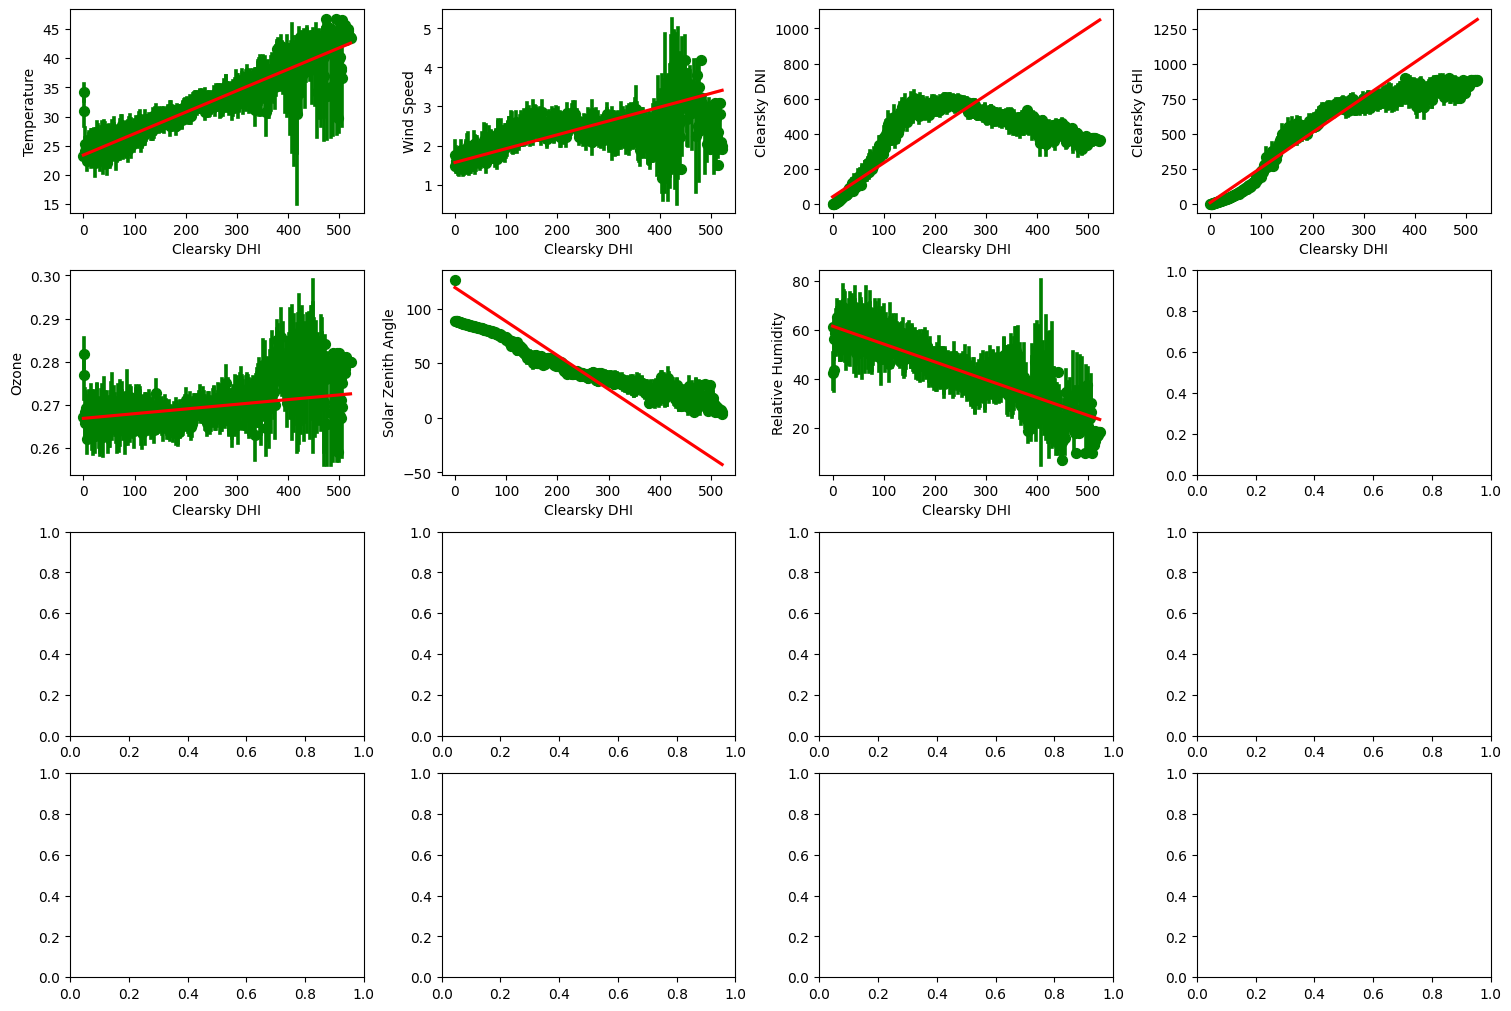

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(15, 10), layout='constrained',sharex=False, sharey=False)

for i in range(0,len(dset_DHI)):
    plt.subplot(4,4,i+1)
    sns.regplot(df, x = df['Clearsky DHI'], y= dset_DHI[i],x_estimator=np.mean, color='green', line_kws={"color": "red"})

plt.show()

## ClearSky DNI

In [ ]:
df_corr['Clearsky DNI']

Temperature           0.472744
Dew Point             0.042353
Surface Albedo        0.013071
Pressure             -0.068340
Wind Direction        0.075611
Wind Speed            0.447101
Clearsky DHI          0.826321
Clearsky DNI          1.000000
Clearsky GHI          0.950919
Fill Flag             0.023974
Ozone                 0.063176
Cloud Type           -0.022514
Solar Zenith Angle   -0.869252
Precipitable Water    0.086767
Relative Humidity    -0.247211
Name: Clearsky DNI, dtype: float64

In [ ]:
#consider corr values >0.2 or <-0.2
dset_DNI = [df['Temperature'],df['Wind Speed'],df['Clearsky DHI'], df['Clearsky GHI'], df['Solar Zenith Angle'],df['Relative Humidity']]

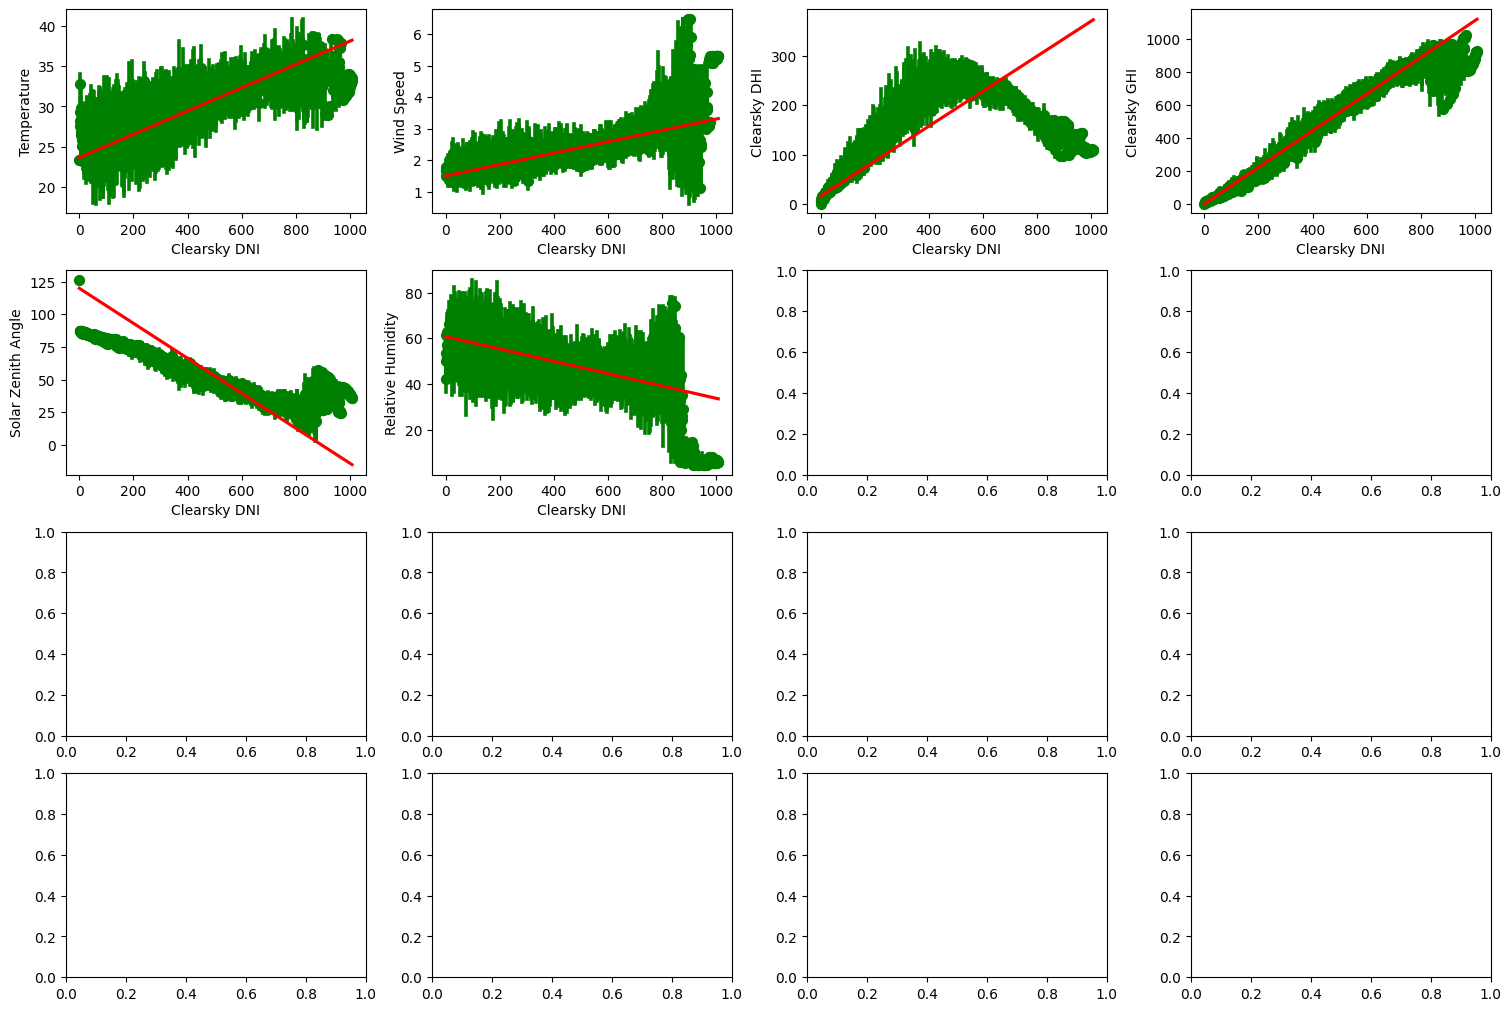

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(15, 10), layout='constrained',sharex=False, sharey=False)

for i in range(0,len(dset_DNI)):
    plt.subplot(4,4,i+1)
    sns.regplot(df, x = df['Clearsky DNI'], y= dset_DNI[i],x_estimator=np.mean, color='green', line_kws={"color": "red"})

plt.show()

## ClearSky GHI

In [ ]:
df_corr['Clearsky GHI']

Temperature           0.534371
Dew Point             0.072345
Surface Albedo        0.088614
Pressure             -0.119537
Wind Direction        0.066095
Wind Speed            0.441383
Clearsky DHI          0.914395
Clearsky DNI          0.950919
Clearsky GHI          1.000000
Fill Flag             0.003519
Ozone                 0.104435
Cloud Type           -0.004506
Solar Zenith Angle   -0.889051
Precipitable Water    0.116491
Relative Humidity    -0.264614
Name: Clearsky GHI, dtype: float64

In [ ]:
#consider corr values >0.2 or <-0.2
dset_GHI = [df['Temperature'],df['Wind Speed'],df['Clearsky DHI'],df['Clearsky DNI'],df['Solar Zenith Angle'],df['Relative Humidity']]

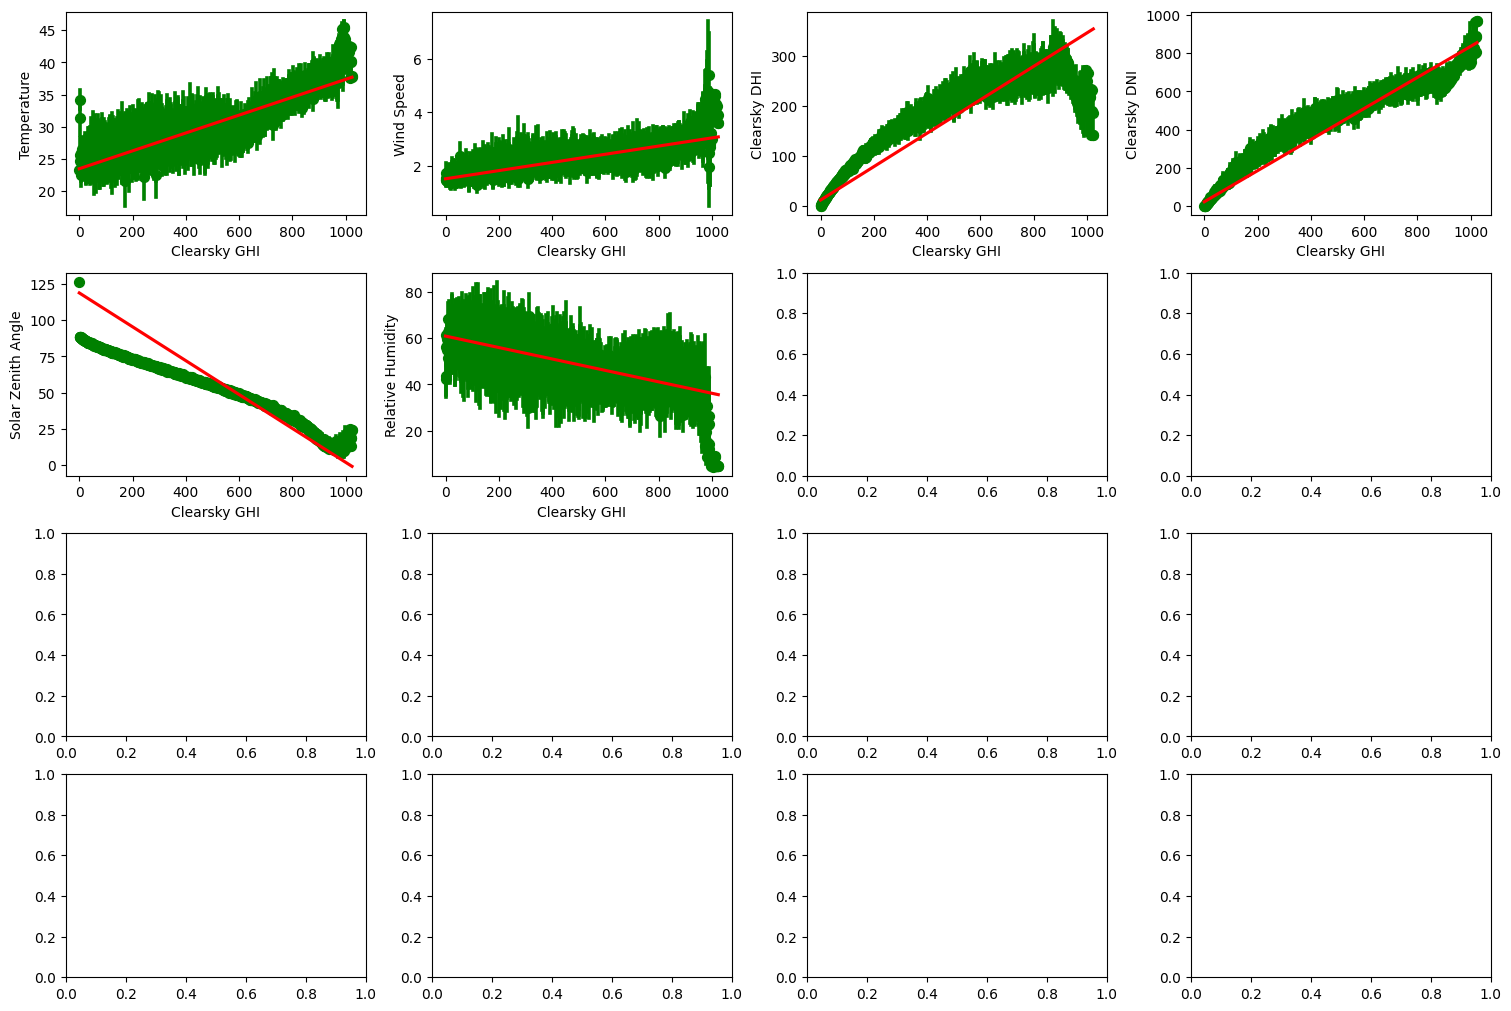

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(15, 10), layout='constrained',sharex=False, sharey=False)

for i in range(0,len(dset_GHI)):
    plt.subplot(4,4,i+1)
    sns.regplot(df, x = df['Clearsky GHI'], y= dset_GHI[i],x_estimator=np.mean, color='green', line_kws={"color": "red"})

plt.show()

## Ozone

In [ ]:
df_corr['Ozone']

Temperature           0.616804
Dew Point             0.041326
Surface Albedo        0.419163
Pressure             -0.503190
Wind Direction       -0.104419
Wind Speed            0.208603
Clearsky DHI          0.085781
Clearsky DNI          0.063176
Clearsky GHI          0.104435
Fill Flag             0.087823
Ozone                 1.000000
Cloud Type            0.169983
Solar Zenith Angle   -0.137830
Precipitable Water    0.258904
Relative Humidity    -0.346209
Name: Ozone, dtype: float64

In [ ]:
#consider corr values >0.2 or <-0.2
dset_ozone = [df['Temperature'], df['Surface Albedo'],df['Pressure'],df['Wind Speed'],df['Precipitable Water'],df['Relative Humidity']]

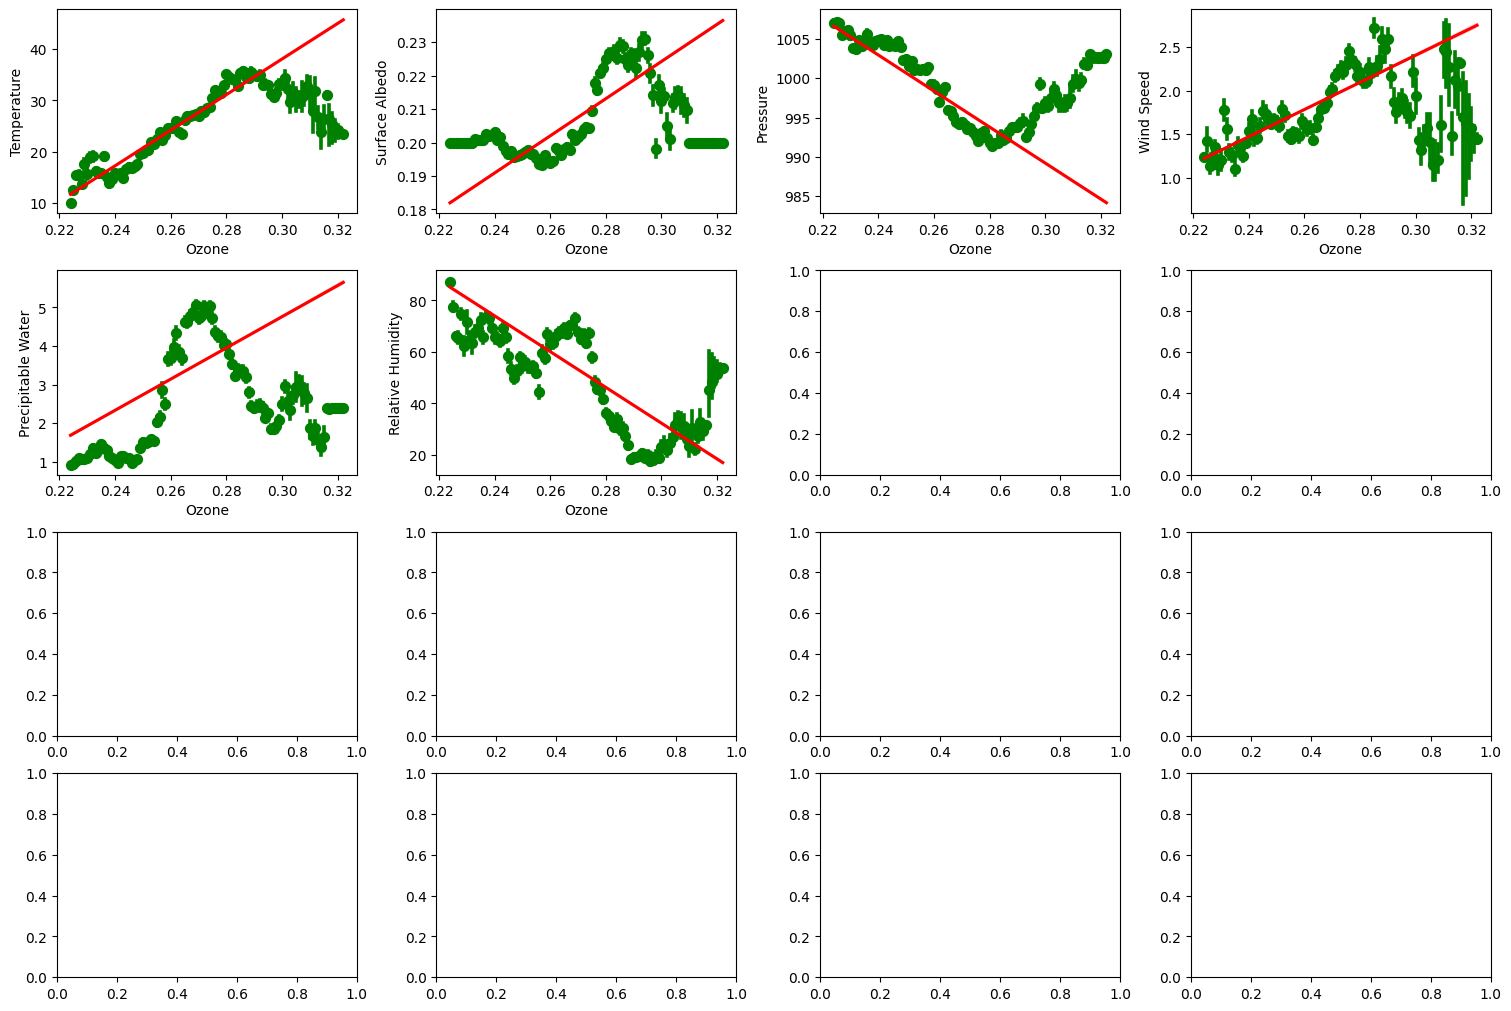

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(15, 10), layout='constrained',sharex=False, sharey=False)

for i in range(0,len(dset_ozone)):
    plt.subplot(4,4,i+1)
    sns.regplot(df, x = df['Ozone'], y= dset_ozone[i],x_estimator=np.mean, color='green', line_kws={"color": "red"})

plt.show()

## Cloud Type


In [ ]:
df_corr['Cloud Type']

Temperature           0.213427
Dew Point             0.556847
Surface Albedo        0.020605
Pressure             -0.496451
Wind Direction       -0.233463
Wind Speed            0.090756
Clearsky DHI         -0.039626
Clearsky DNI         -0.022514
Clearsky GHI         -0.004506
Fill Flag             0.252914
Ozone                 0.169983
Cloud Type            1.000000
Solar Zenith Angle   -0.030178
Precipitable Water    0.719492
Relative Humidity     0.399291
Name: Cloud Type, dtype: float64

In [ ]:
#consider corr values >0.2 or <-0.2
dset_cloudtype = [df['Temperature'],df['Dew Point'], df['Pressure'],df['Wind Direction'],df['Fill Flag'],df['Precipitable Water'],df['Relative Humidity']]

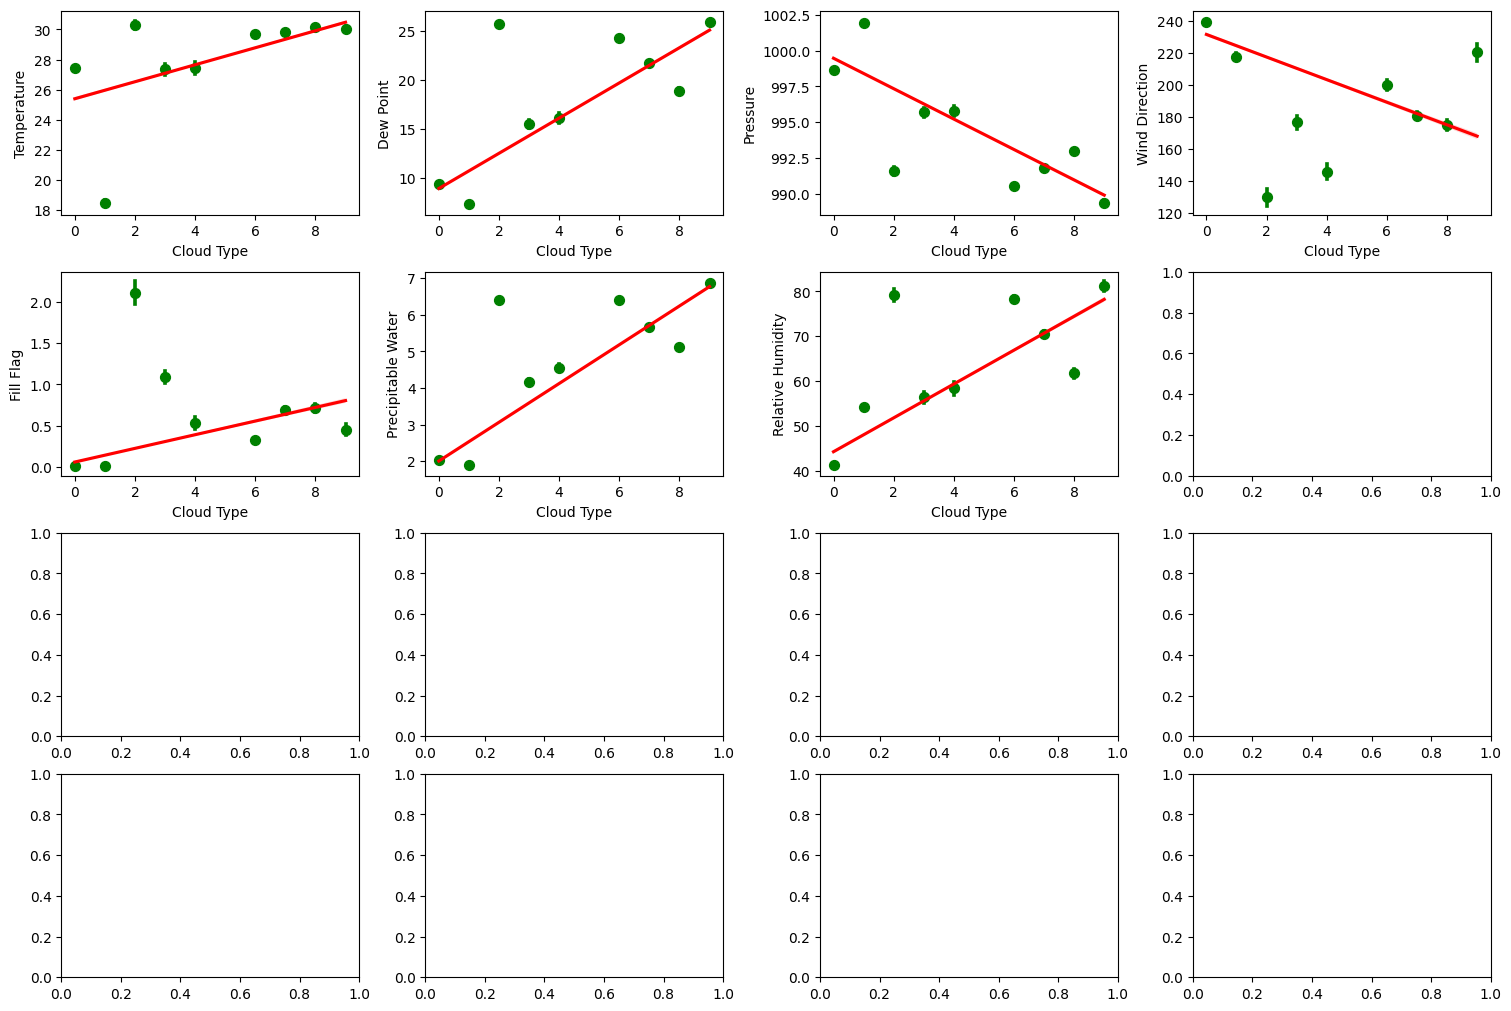

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(15, 10), layout='constrained',sharex=False, sharey=False)

for i in range(0,len(dset_cloudtype)):
    plt.subplot(4,4,i+1)
    sns.regplot(df, x = df['Cloud Type'], y= dset_cloudtype[i],x_estimator=np.mean, color='green', line_kws={"color": "red"})

plt.show()

## Solar Zenith Angle

In [ ]:
df_corr['Solar Zenith Angle']

Temperature          -0.558141
Dew Point            -0.129139
Surface Albedo       -0.142041
Pressure              0.184072
Wind Direction       -0.065134
Wind Speed           -0.424678
Clearsky DHI         -0.863835
Clearsky DNI         -0.869252
Clearsky GHI         -0.889051
Fill Flag            -0.123669
Ozone                -0.137830
Cloud Type           -0.030178
Solar Zenith Angle    1.000000
Precipitable Water   -0.170622
Relative Humidity     0.236886
Name: Solar Zenith Angle, dtype: float64

In [ ]:
#consider corr values >0.2 or <-0.2
dset_sza = [df['Temperature'], df['Wind Speed'],df['Clearsky DHI'],df['Clearsky DNI'],df['Clearsky GHI'],df['Relative Humidity']]

KeyboardInterrupt: ignored

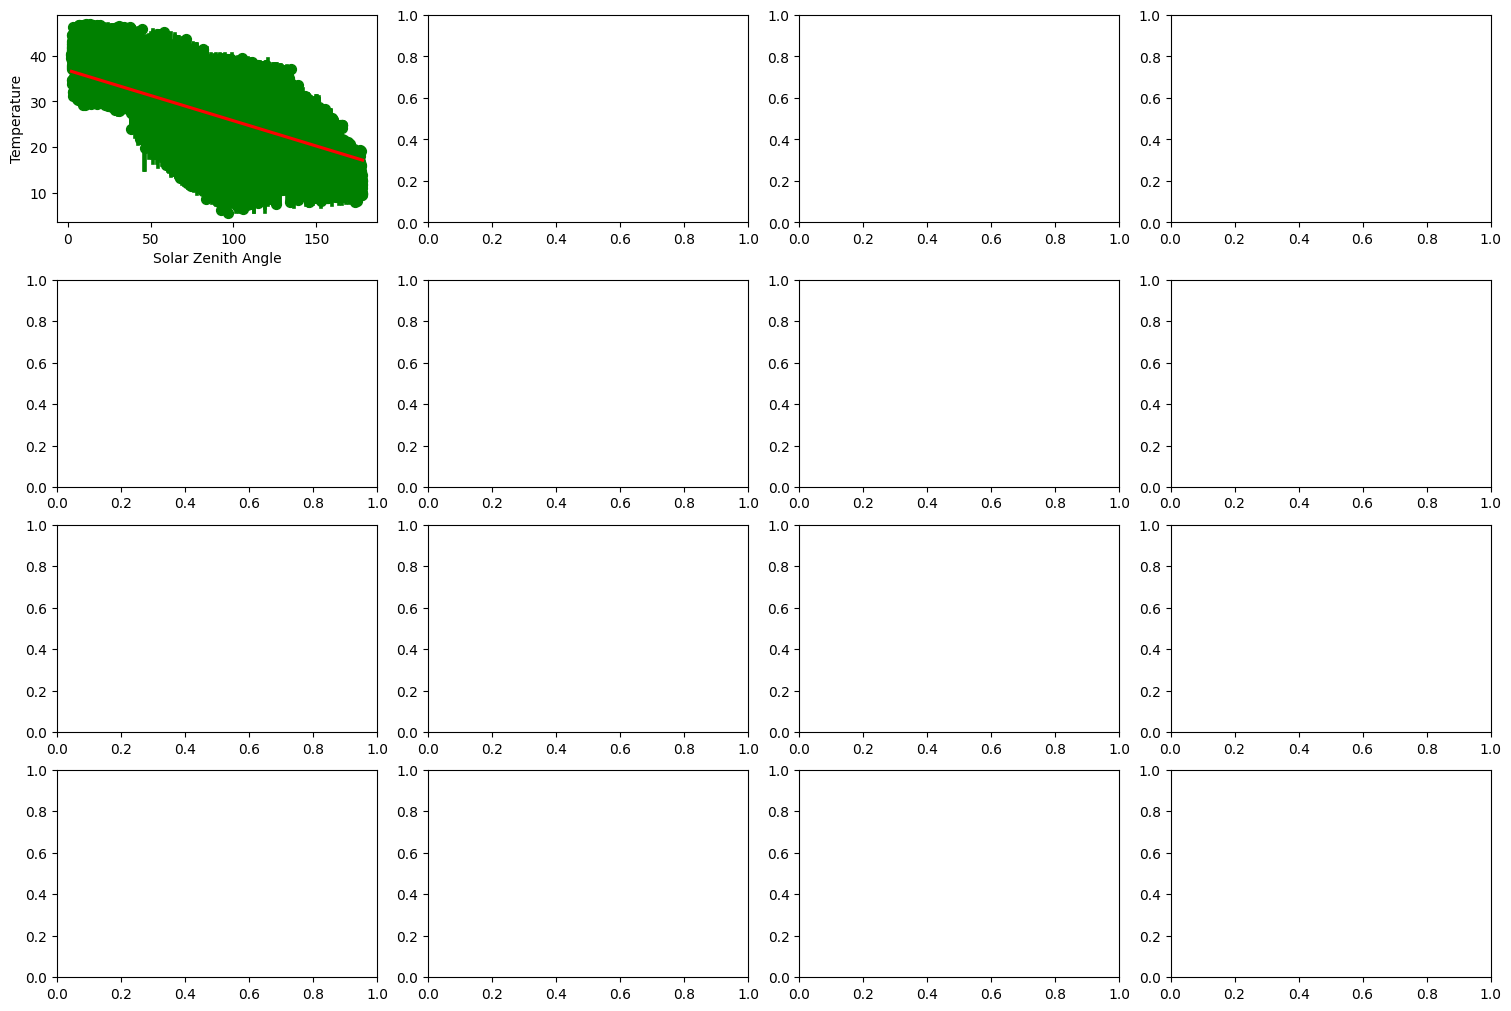

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(15, 10), layout='constrained',sharex=False, sharey=False)

for i in range(0,len(dset_sza)):
    plt.subplot(4,4,i+1)
    sns.regplot(df, x = df['Solar Zenith Angle'], y= dset_sza[i],x_estimator=np.mean, color='green', line_kws={"color": "red"})

plt.show()

## Precipitable Water 

In [ ]:
df_corr['Precipitable Water']

Temperature           0.425330
Dew Point             0.862939
Surface Albedo        0.110625
Pressure             -0.765089
Wind Direction       -0.347329
Wind Speed            0.185088
Clearsky DHI          0.068949
Clearsky DNI          0.086767
Clearsky GHI          0.116491
Fill Flag             0.191116
Ozone                 0.258904
Cloud Type            0.719492
Solar Zenith Angle   -0.170622
Precipitable Water    1.000000
Relative Humidity     0.544829
Name: Precipitable Water, dtype: float64

In [ ]:
#consider corr values >0.2 or <-0.2
dset_pw = [df['Temperature'], df['Dew Point'],df['Pressure'],df['Wind Direction'],df['Ozone'],df['Cloud Type'],df['Relative Humidity']]

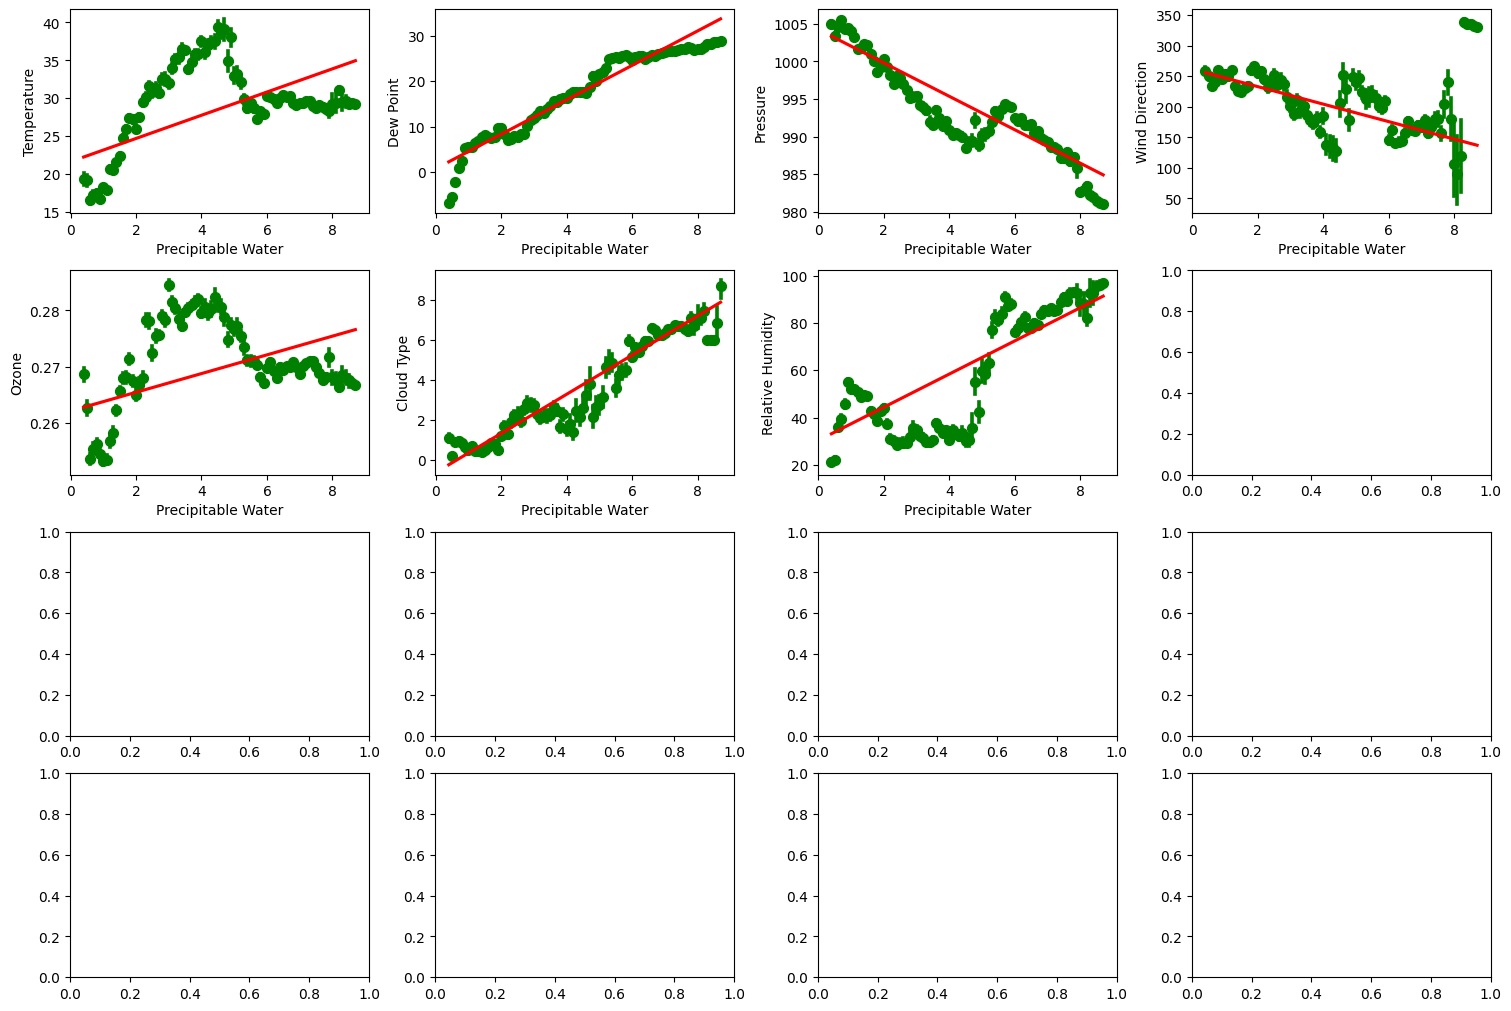

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(15, 10), layout='constrained',sharex=False, sharey=False)

for i in range(0,len(dset_pw)):
    plt.subplot(4,4,i+1)
    sns.regplot(df, x = df['Precipitable Water'], y= dset_pw[i],x_estimator=np.mean, color='green', line_kws={"color": "red"})

plt.show()

## Relative Humidity

In [ ]:
df_corr['Relative Humidity']

Temperature          -0.375786
Dew Point             0.756159
Surface Albedo       -0.367921
Pressure             -0.181320
Wind Direction       -0.159116
Wind Speed           -0.141111
Clearsky DHI         -0.286436
Clearsky DNI         -0.247211
Clearsky GHI         -0.264614
Fill Flag             0.062048
Ozone                -0.346209
Cloud Type            0.399291
Solar Zenith Angle    0.236886
Precipitable Water    0.544829
Relative Humidity     1.000000
Name: Relative Humidity, dtype: float64

In [ ]:
#consider corr values >0.2 or <-0.2
dset_rh = [df['Temperature'], df['Dew Point'],df['Surface Albedo'],df['Clearsky DHI'],df['Clearsky DNI'],df['Clearsky GHI'],df['Ozone'],df['Cloud Type'],df['Solar Zenith Angle'],df['Precipitable Water']]

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(15, 10), layout='constrained',sharex=False, sharey=False)

for i in range(0,len(dset_rh)):
    plt.subplot(4,4,i+1)
    sns.regplot(df, x = df['Relative Humidity'], y= dset_rh[i],x_estimator=np.mean, color='green', line_kws={"color": "red"})

plt.show()

# Feature Selection

In [14]:
selected_columns = ['Timestamp','Temperature', 'Surface Albedo', 'Pressure',
       'Wind Direction', 'Wind Speed', 'Clearsky DHI', 'Clearsky DNI',
       'Clearsky GHI', 'Ozone',
       'Solar Zenith Angle', 'Precipitable Water', 'Relative Humidity']


df_processed = df[selected_columns].reset_index(drop=True)

In [15]:
df_processed

,Timestamp,Temperature,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Ozone,Solar Zenith Angle,Precipitable Water,Relative Humidity
0,01-01-2019 00:00,12.5,0.21,1005,121,1.0,0,0,0,0.258,173.92,1.4,68.82
1,01-01-2019 00:10,12.3,0.21,1005,122,1.0,0,0,0,0.258,171.79,1.3,69.73
2,01-01-2019 00:20,12.1,0.21,1005,124,1.0,0,0,0,0.258,169.59,1.3,70.65
3,01-01-2019 00:30,12.0,0.21,1005,125,1.0,0,0,0,0.258,167.37,1.3,71.11
4,01-01-2019 00:40,11.8,0.21,1005,126,1.0,0,0,0,0.258,165.13,1.3,71.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210235,31-12-2022 23:10,6.9,0.21,1009,54,1.2,0,0,0,0.279,173.77,1.8,92.63
210236,31-12-2022 23:20,6.8,0.21,1009,54,1.2,0,0,0,0.279,175.77,1.8,93.26
210237,31-12-2022 23:30,6.8,0.21,1009,55,1.1,0,0,0,0.279,177.31,1.8,93.26
210238,31-12-2022 23:40,6.8,0.21,1009,55,1.1,0,0,0,0.279,177.36,1.8,91.95


In [16]:
#target values
target_label = ['Clearsky DHI','Clearsky GHI','Clearsky DNI']

input_features = list(set(selected_columns).difference(set(target_label)))
input_features

['Solar Zenith Angle',
 'Temperature',
 'Ozone',
 'Precipitable Water',
 'Wind Speed',
 'Relative Humidity',
 'Surface Albedo',
 'Pressure',
 'Wind Direction',
 'Timestamp']

# Splitting Dataset

In [19]:
df_X = df_processed[input_features].reset_index(drop=True)
df_y = df_processed[target_label]

In [20]:
# random-state : parameter may be provided to control the random number generator used.
# Popular integer random seeds are 0 and 42. Integer values must be in the range [0, 2**32 - 1].
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

In [22]:
X_train.head()

,Solar Zenith Angle,Temperature,Ozone,Precipitable Water,Wind Speed,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Timestamp
187594,82.02,29.2,0.265,7.0,0.7,88.73,0.24,987,47,27-07-2022 17:40
168358,118.02,17.3,0.264,1.6,1.6,44.14,0.20,1004,321,16-03-2022 03:40
179449,97.20,29.2,0.288,2.2,2.1,22.16,0.24,990,117,01-06-2022 04:10
34463,55.15,30.4,0.274,5.7,2.0,81.33,0.18,997,170,28-08-2019 07:50
60004,79.90,26.2,0.253,1.8,1.6,36.90,0.20,995,294,21-02-2020 16:40


In [25]:
y_train.head()

,Clearsky DHI,Clearsky GHI,Clearsky DNI
187594,51,72,153
168358,0,0,0
179449,0,0,0
34463,128,505,660
60004,71,113,243


In [29]:
print(X_train.shape, y_train.shape)

(168192, 10) (168192, 3)


In [23]:
X_test.head()

,Solar Zenith Angle,Temperature,Ozone,Precipitable Water,Wind Speed,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Timestamp
84120,103.88,26.7,0.264,7.0,1.2,100.00,0.23,991,145,08-08-2020 04:00
79806,88.13,26.9,0.270,7.9,2.6,98.06,0.24,988,245,09-07-2020 05:00
75307,131.43,32.4,0.281,3.8,1.3,56.00,0.25,991,25,07-06-2020 23:10
109357,48.99,26.7,0.260,0.7,4.8,11.33,0.20,1005,288,30-01-2021 10:10
27886,55.06,33.7,0.266,7.3,1.2,65.78,0.22,986,201,13-07-2019 15:40


In [30]:
y_test.head()

,Clearsky DHI,Clearsky GHI,Clearsky DNI
84120,0,0,0
79806,3,3,0
75307,0,0,0
109357,179,673,752
27886,155,491,587


In [31]:
print(X_test.shape, y_test.shape)

(42048, 10) (42048, 3)
